# Energy as a function of dihedral angle in ethane

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Restarting kernel...


In [1]:
import subprocess
import sys
subprocess.run("rm -rf /usr/local/conda-meta/pinned", shell=True)
subprocess.run("pip -q install py3Dmol", shell=True)
subprocess.run("!mamba install -c anaconda intel-openmp", shell=True)
subprocess.run("conda config --add channels http://conda.anaconda.org/psi4", shell=True)
subprocess.run("mamba install psi4 resp -c conda-forge/label/libint_dev -c conda-forge", shell=True)
subprocess.run("pip install rdkit-pypi", shell=True)
subprocess.run("pip install Cython", shell=True)
subprocess.run("mamba install -c conda-forge parmed -y", shell=True)
subprocess.run("mamba install -c conda-forge openbabel -y", shell=True)

import os
import psi4
import numpy as np
import resp
import openbabel as ob
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
geometry = """
C
C 1 1.5307
H 1 1.0936 2 111.3578
H 1 1.0936 2 111.3578 3 120
H 1 1.0936 2 111.3578 3 240
H 2 1.0936 1 111.3578 3 60
H 2 1.0936 1 111.3578 3 180
H 2 1.0936 1 111.3578 3 300
"""

In [3]:
ethane = psi4.geometry(geometry)
E, wfn = psi4.energy('scf/6-31g',molecule=ethane, return_wfn=True)
psi4.molden(wfn,'ethane.molden')

In [4]:
x = []
y = []

dihedrals = np.arange (0,360, 10)
for d in dihedrals:
    geometry = f"""
    C
    C 1 1.5307
    H 1 1.0936 2 111.3578
    H 1 1.0936 2 111.3578 3 120
    H 1 1.0936 2 111.3578 3 240
    H 2 1.0936 1 111.3578 3 {d}
    H 2 1.0936 1 111.3578 3 {d+120}
    H 2 1.0936 1 111.3578 3 {d+240}
    """

    ethane = psi4.geometry(geometry)
    E, wfn = psi4.energy('scf/6-31g',molecule=ethane, return_wfn=True)
    print (d,E)
    x.append(d)
    y.append(E)

0 -79.19262069603653
10 -79.19293030491322
20 -79.19377430694418
30 -79.19492291730428
40 -79.19606663092557
50 -79.19690079979074
60 -79.19720547168654
70 -79.1969007997792
80 -79.19606663095159
90 -79.19492291728693
100 -79.19377430698796
110 -79.19293030489649
120 -79.19262069599111
130 -79.19293030488834
140 -79.19377430698671
150 -79.19492291735637
160 -79.19606663093316
170 -79.19690079975501
180 -79.19720547164953
190 -79.19690079984227
200 -79.19606663094275
210 -79.19492291729675
220 -79.19377430695329
230 -79.19293030490849
240 -79.19262069598976
250 -79.19293030489449
260 -79.19377430699318
270 -79.19492291734119
280 -79.19606663092785
290 -79.19690079976934
300 -79.19720547169123
310 -79.19690079975113
320 -79.19606663091898
330 -79.19492291733957
340 -79.19377430702782
350 -79.19293030487178


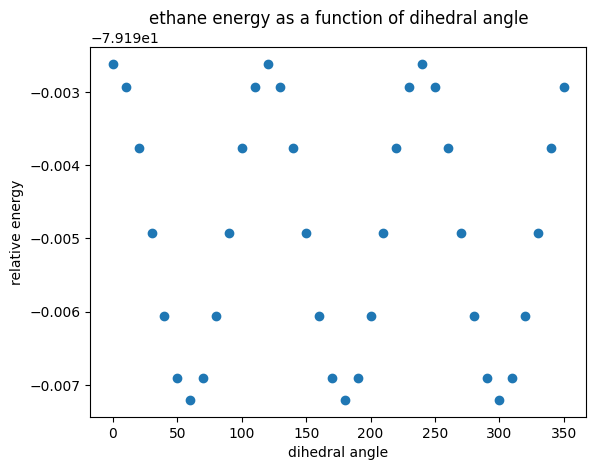

In [5]:
from matplotlib import pyplot as plt

plt.scatter(x,y)
plt.title('ethane energy as a function of dihedral angle')
plt.xlabel('dihedral angle')
plt.ylabel('relative energy')
plt.savefig('Ethane.png')


In [6]:
del_E = (max(y)-min(y)) * 627.509
print(del_E)

2.8769880156563024


In [7]:
# prompt: calculate equilibrium constant from difference in free energy

import math

# Assuming del_E is in kcal/mol and T is in Kelvin
T = 298.15  # Standard room temperature
R = 1.98720425864083e-3  # Gas constant in kcal/(mol*K)

# Calculate the equilibrium constant
K_eq = math.exp(-del_E / (R * T))

print("Equilibrium constant (K_eq):", K_eq)


Equilibrium constant (K_eq): 0.007783109674663403
